In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing

import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display

#from grafica import *
from ClassNeuronaLineal import NeuronaLineal

In [3]:
# Leer HOUSING.csv
df = pd.read_csv("../Datos/CCPP.csv")
#nColum = list(datos.columns.values)
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


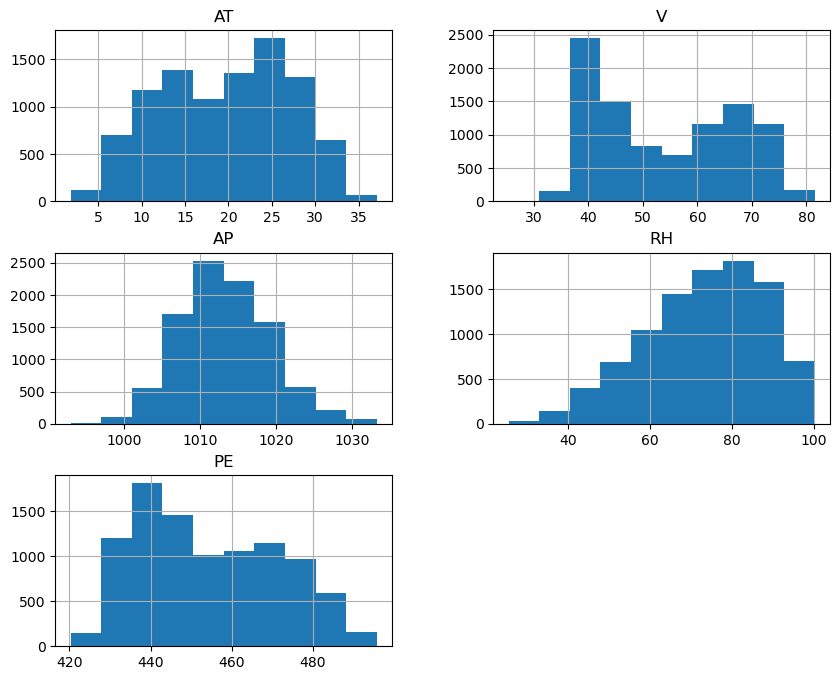

In [4]:
nn = df.hist(figsize=(10, 8))

In [5]:
Ejemplos = np.array(df)

normalizarEntrada = 1

if normalizarEntrada:
    normalizador = preprocessing.MinMaxScaler()
    Ejemplos = normalizador.fit_transform(Ejemplos)

In [6]:
nomCol = np.array(df.columns.values)

attPred = 4 #AT 	V 	AP 	RH 	PE- nro de atributo a predecir    
T = Ejemplos[:, attPred]  
X = np.delete(Ejemplos, [attPred], 1) #elimina la columna 12 a lo largo del eje 1
nomBuscado = nomCol[attPred]
nomCol = np.delete(nomCol,[attPred])


In [7]:
#nl = NeuronaLineal(alpha=0.01, n_iter=30, cotaE=10e-06)
#nl.fit(X, T)

nl = NeuronaLineal(alpha=0.01, n_iter=30, cotaE=10e-06)
MAX_INTENTOS = 10
W = np.zeros((MAX_INTENTOS,X.shape[1]))
b = np.zeros(MAX_INTENTOS)
for i in range(MAX_INTENTOS):
    res=nl.fit(X, T)
    W[i,:]= nl.w_
    b[i] = nl.b_
print("Ejecuciones listas!")

Ejecuciones listas!


In [8]:
print("W = ", W)
print("b = ", b)

W =  [[-0.92247236 -0.17564463  0.02829916 -0.15466367]
 [-0.92247114 -0.17564531  0.02829972 -0.15466314]
 [-0.92247308 -0.17564423  0.02829884 -0.15466398]
 [-0.92247182 -0.17564493  0.02829941 -0.15466344]
 [-0.92247728 -0.1756419   0.02829694 -0.15466581]
 [-0.922462   -0.17565037  0.02830385 -0.15465917]
 [-0.92247558 -0.17564284  0.02829771 -0.15466507]
 [-0.92246664 -0.1756478   0.02830176 -0.15466118]
 [-0.9224706  -0.17564561  0.02829996 -0.1546629 ]
 [-0.92247377 -0.17564385  0.02829853 -0.15466428]]
b =  [1.08752893 1.08752805 1.08752945 1.08752854 1.08753246 1.08752148
 1.08753124 1.08752481 1.08752766 1.08752994]


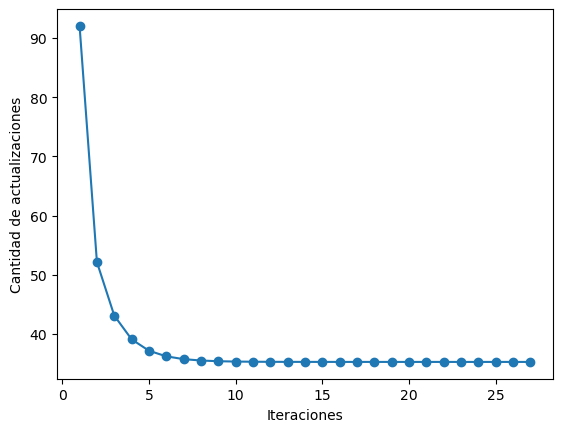

In [9]:
plt.plot(range(1, len(nl.errors_) + 1), nl.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

W =  [-0.92247143 -0.17564515  0.02829959 -0.15466326]
b =  1.0875282551669119


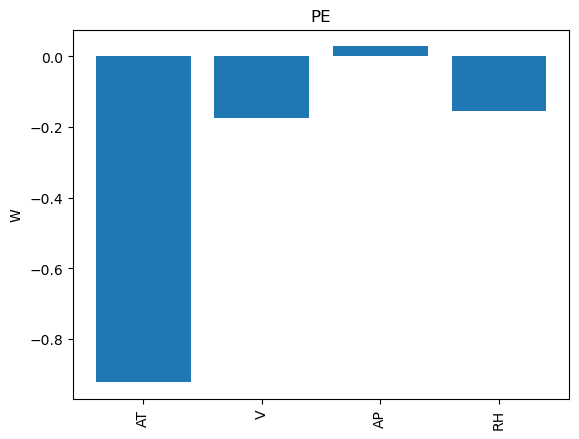

In [10]:
barras = np.mean(W,axis=0)  #nl.w_
print("W = ", barras)
print("b = ", np.mean(b))

plt.figure()
N = len(barras)
plt.bar(np.arange( N ), barras)  # Gráfico de barras
plt.title(nomBuscado)      # Colocamos el título
plt.ylabel('W')
# Colocamos las etiquetas del eje x
plt.xticks(np.arange( N ), nomCol, rotation=90)
plt.show()

<Figure size 640x480 with 0 Axes>

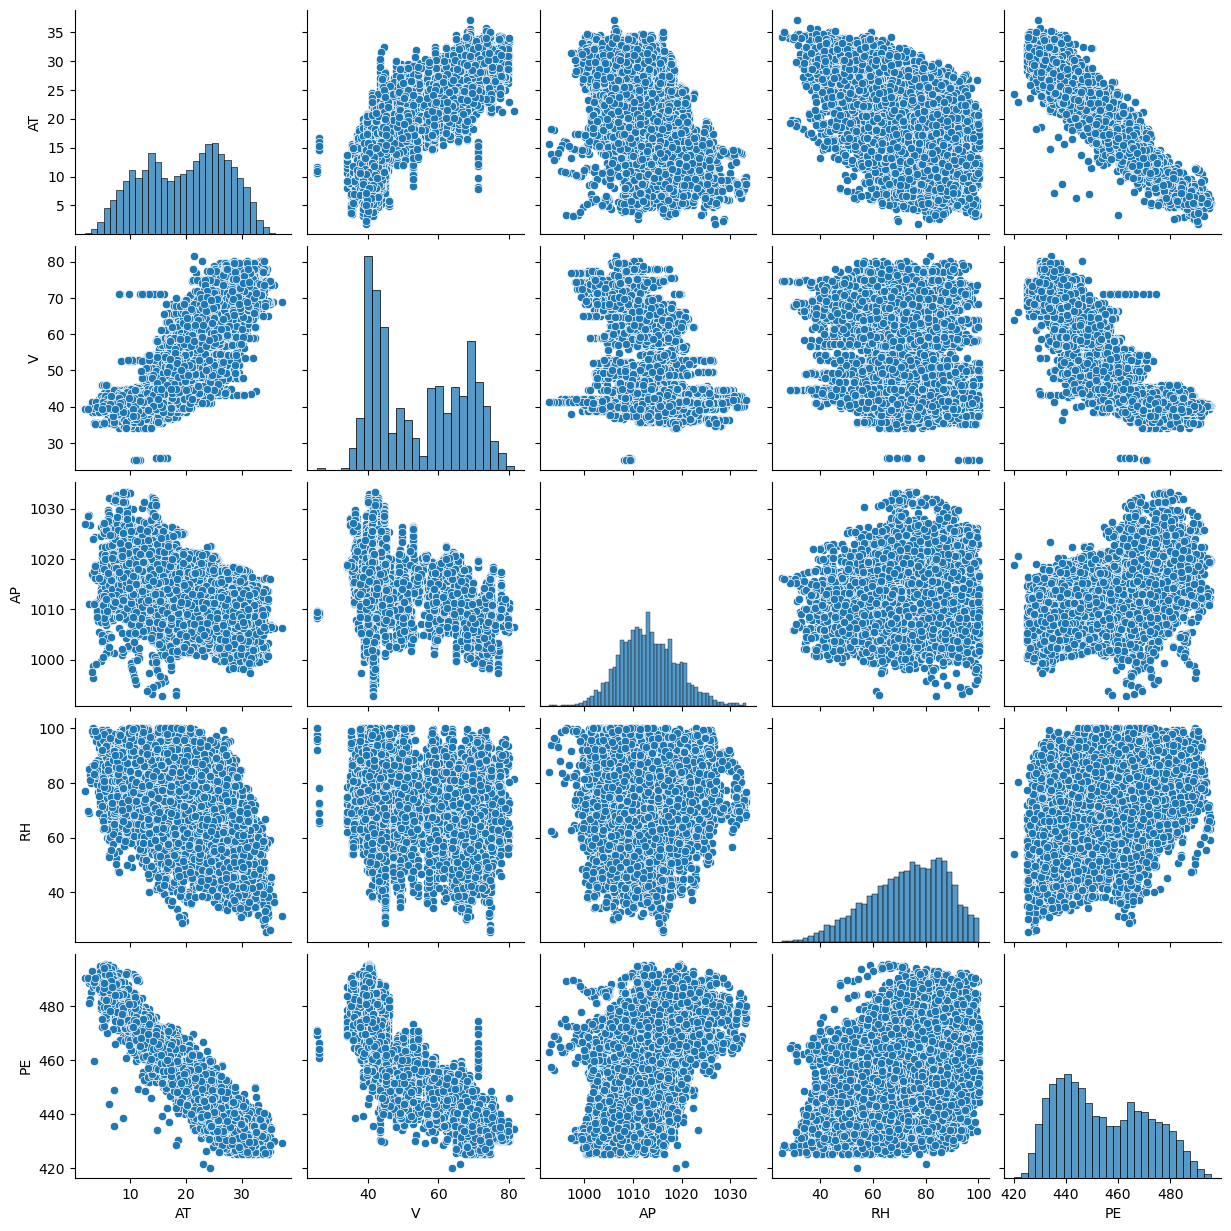

In [11]:
import seaborn as sns
plt.figure()
sns.pairplot(df)
plt.show()

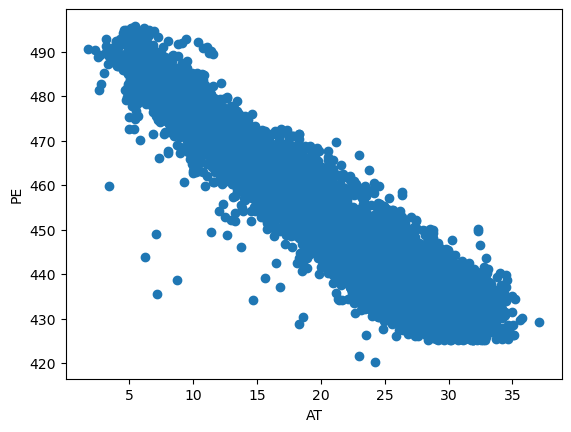

In [12]:
plt.figure()
plt.scatter(df['AT'],df[nomBuscado])
plt.xlabel('AT')
plt.ylabel(nomBuscado)
plt.show()